# Name: Snehal Shyam Jagtap

# CLUSTERING ANALYSIS

## Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.



## 1. Data Preprocessing:

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:

# For handling warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)

In [16]:
# Load the dataset
data = pd.read_csv('EastWestAirlines.csv')

In [17]:
# Display the first few rows of the dataset
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [18]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [19]:
features = data.drop(columns=['ID#', 'Award?'])

In [20]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [21]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

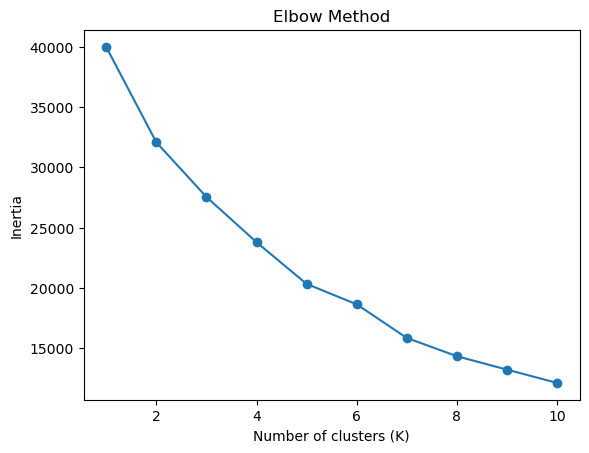

In [22]:
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [23]:
optimal_k = 3  # Set this to the K value you determine is optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

In [24]:
print(data.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   Cluster  
0        0  
1        0  
2        0 

In [25]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_features, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3303711060539158


In [26]:
cluster_counts = data['Cluster'].value_counts()
print(cluster_counts)

0    2491
1    1344
2     164
Name: Cluster, dtype: int64


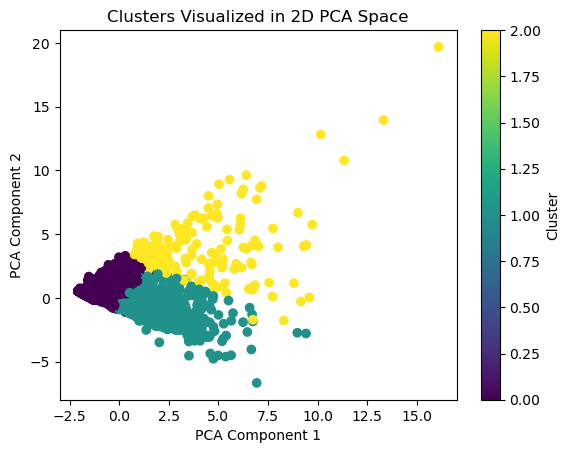

In [27]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plotting
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Clusters Visualized in 2D PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [28]:
eps = 0.5  # Example value
min_samples = 5  # Example value


In [29]:
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['Cluster'] = dbscan.fit_predict(scaled_features)

In [30]:
if len(set(data['Cluster'])) > 1:  # Ensure there's more than one cluster
    silhouette_avg = silhouette_score(scaled_features, data['Cluster'])
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print("Silhouette score cannot be computed; only one cluster detected.")

Silhouette Score: -0.07406726457859085


In [31]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

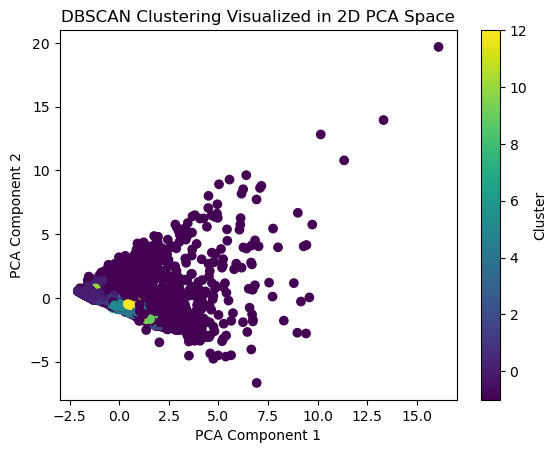

In [32]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering Visualized in 2D PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [33]:
n_clusters = 3
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters)
data['Cluster'] = hierarchical_model.fit_predict(scaled_features)

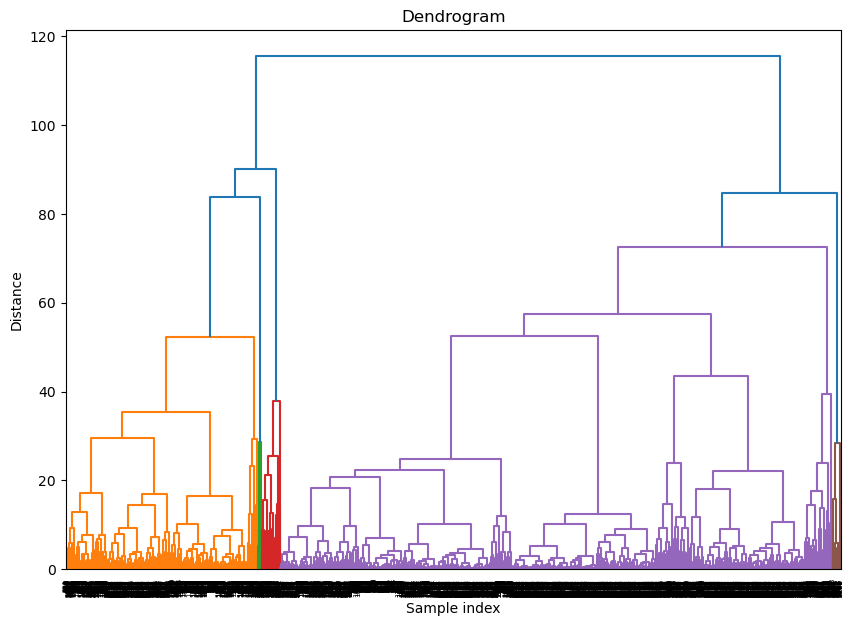

In [34]:
plt.figure(figsize=(10, 7))
linked = linkage(scaled_features, 'ward')  # 'ward' is one of the methods
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [35]:
if len(set(data['Cluster'])) > 1:
    silhouette_avg = silhouette_score(scaled_features, data['Cluster'])
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print("Silhouette score cannot be computed; only one cluster detected.")

Silhouette Score: 0.31619409882758315


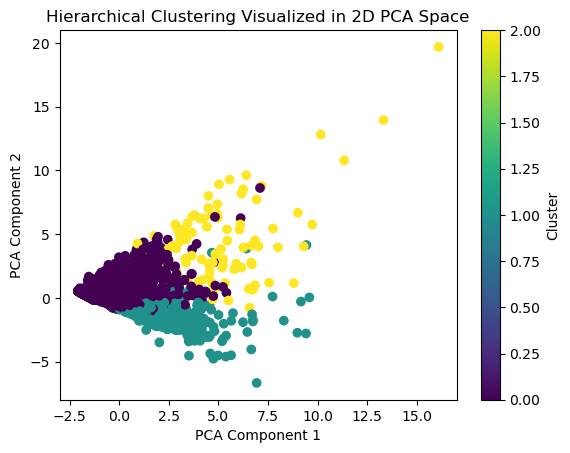

In [36]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('Hierarchical Clustering Visualized in 2D PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()